<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data=pd.read_csv('./Data/dst-3.0_16_1_hh_database.csv', sep=";")

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
data.sample(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
21128,"Женщина , 34 года , родилась 17 мая 1984",35000 руб.,Специалист по интернет-маркетингу,"Челябинск , не готова к переезду , готова к ре...","частичная занятость, полная занятость","гибкий график, полный день",Опыт работы 12 лет 9 месяцев Сентябрь 2013 — ...,Уральский социально-экономический институт,помощник директора,Высшее образование (Кандидат наук) 2012 Южно-...,10.04.2019 19:19,Не указано
41168,"Мужчина , 31 год , родился 30 апреля 1987",120000 руб.,"Full-stack web-developer node.js, js, python, php","Екатеринбург , не готов к переезду , не готов ...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 6 лет Full-stack web-developer no...,ООО ФДС,full-stack web-developer,Высшее образование 2010 Уральский федеральный...,22.04.2019 08:08,Не указано
32964,"Женщина , 28 лет , родилась 25 декабря 1990",45000 руб.,Технический писатель,"Томск , не готова к переезду , готова к редким...",полная занятость,полный день,Опыт работы 5 лет 6 месяцев Технический писат...,"ООО ""СпецСвязьОборудование""",Инженер по стандартизации,Высшее образование 2013 Национальный исследов...,22.04.2019 12:11,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
# код на обращение внимания?

5. Выведите основную статистическую информацию о столбцах.


In [6]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


### Задания:

Задание 2.1 

Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).

In [7]:
data.shape

(44744, 12)

 Задание 2.2

Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [8]:
data.head(3)['Пол, возраст']

0      Мужчина ,  39 лет , родился 27 ноября 1979
1       Мужчина ,  60 лет , родился 20 марта 1959
2    Женщина ,  36 лет , родилась 12 августа 1982
Name: Пол, возраст, dtype: object

 Задание 2.3 (одинаковое решение с 2.4)

Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

Какой тип данных имеют все столбцы? Введите его в поле для ответа.

 Задание 2.4

Обратите внимание на информацию о числе непустых значений.
Выберите все признаки, в которых есть пропуски в данных:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

 Задание 2.5

Выведите основную статистическую информацию о столбцах.

Сколько уникальных значений содержится в столбце «Опыт работы»?

In [10]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [11]:
data['Образование'] = data['Образование и ВУЗ'].apply(lambda x: x.split(' ')[0] 
                                                      if x.split(' ')[1] == 'образование' 
                                                      else x.split(' ')[0] + ' ' + x.split(' ')[1])
# Не хотел писать такую длинную лямбду, но если вам прям действительно мешает слово "образование"...
data.drop('Образование и ВУЗ', inplace=True, axis=1)

 Задание 3.1

Сколько соискателей имеет средний уровень образования (школьное образование)?

In [12]:
data['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [13]:
data['Пол, возраст']
data['Пол'] = data['Пол, возраст'].apply(lambda x: x[0])

pattern = '[0-9]+'  # Я не помню были ли в курсе regex, но я их использую - очень не хочется крутить
# if else циклы или заморачиваться со split(). (В предыдущей версии курса DST 2.0 
# с которой меня перевели regex точно был, так что формально - ничего не нарушаю).
data['Возраст'] = data['Пол, возраст'].apply(lambda x: int(re.findall(pattern, x)[0]))
data.drop('Пол, возраст', inplace=True, axis=1)
data[["Пол", "Возраст"]]

,Пол,Возраст
0,М,39
1,М,60
2,Ж,36
3,М,38
4,Ж,26
...,...,...
44739,М,30
44740,М,27
44741,Ж,48
44742,М,24


Задание 3.2

Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

In [14]:
round(data['Пол'].value_counts(normalize=True)[1]*100, 2)

19.07

Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [15]:
round(data['Возраст'].mean(),1)

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [16]:
def exp_extractor(exp_descr):
    ''' Функция выделяет общий опыт из графы "Опыт работы" и переводит в месяцы'''
    
    # Проверяем на пропуски и скрытые пропуски:
    if type(exp_descr) == float:
        return np.nan
    elif exp_descr == "Не указано":
        return np.nan
    
    # абзацы разделяются двумя пробелами - 
    # можем удобно отсечь только общий опыт работы лежащий в первом абзаце
    exp_length = exp_descr.split('  ')[0] 

    # Через regex создадим два списка для месяцев и годов
    pattern_months = '(\d+)\sмес+'
    # Учитываем нюансы русского языка
    pattern_years = '\d+\sгод+|\d+\sлет' 
    # Извлекаем числовые значения из полученных списков
    try:
        months = int(re.findall(pattern_months, exp_length)[0])
    # Подстраховываемся на случай отсутствия лет\месяцев
    except IndexError:
        months = 0
    try:
        years = int(re.findall(pattern_years, exp_length)[0].split(' ')[0])
    except IndexError:
        years = 0
        
    # Возвращаем сумму месяцев
    return years * 12 + months


data['Опыт работы (месяц)'] = data['Опыт работы'].apply(exp_extractor)
data.drop('Опыт работы', inplace=True, axis=1)


Задание 3.3

Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [17]:
data['Опыт работы (месяц)'].median()

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [18]:
def city_extractor(strg):
    ''' Извлечение города'''
    # Списки городов 
    capitals = ["Москва", "Санкт-Петербург"]
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск',
                      'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь',
                      'Воронеж','Волгоград', 'Всратов']
    # Запятыми разделены смысловые единицы, первой из которых всегда Город
    # Пробелами разделены отдельные слова
    city = strg.split(',')[0].split(' ')[0]
    if city in capitals:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return "другие"
        
        
def relocation_extractor(string):
    ''' Извлечение готовности к переезду'''
    # Разобьем на смысловые единцы по запятой
    for word in string.split(','):
        # Будем искать по ключевым словам (фрагментам слов), потому что порядок элементов иногда прыгает
        if 'перее' in word and 'не' in word:
            return False
        elif 'перее' in word and 'не' not in word:
            return True
        else:
            pass
    
    
def mobility_extractor(string):
    ''' Извлечение готовности к коммандировкам'''
    # Если командировки не упоминаются в строке - выдать False
    if 'команд' not in string:
        return False
    # Разобьем на смысловые единцы по запятой
    for word in string.split(','):
        # Будем искать по ключевым словам (фрагментам слов), потому что порядок элементов иногда прыгает
        if 'команд' in word and 'не' in word:
            return False
        elif 'команд' in word and 'не' not in word:
            return True
        else:
            pass

    
# Используем написанные функции:
data['Город'] = data["Город, переезд, командировки"].apply(city_extractor)
data['Готовность к переезду'] = data["Город, переезд, командировки"].apply(relocation_extractor)
data['Готовность к командировкам'] = data["Город, переезд, командировки"].apply(mobility_extractor)
data.drop("Город, переезд, командировки", inplace=True, axis = 1)

Задание 3.4

Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

In [19]:
round(data['Город'].value_counts(normalize=True) * 100)

Москва              37.0
другие              37.0
город-миллионник    15.0
Санкт-Петербург     11.0
Name: Город, dtype: float64

Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [20]:
# сделаем соответсвующую маску
mask = (data['Готовность к переезду'] == True) & (data['Готовность к командировкам'] == True)
# найдем процент от целого
round(data[mask].shape[0]/data.shape[0] * 100)

32

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [21]:
def one_hot_encoder(df, raw_column):
    
    '''Exploding one feature with One-Hot encoding'''
    
    def categories_extractor(line):
        ''' Scanning all cells of the columns for the unique categoires'''
        for word in line.split(', '):
            categories.add(word)
            
    
    def features_dict_filler(string):
        ''' Filling the dictionari with keys - named by the unique categories'''
        for key in features_dict:
            if key in string:
                features_dict[key].append(True)
            else:
                features_dict[key].append(False)
                
                
    # creating an empty set for the categories assembly            
    categories = set()
    # filling the set
    df[raw_column].apply(categories_extractor)
    # creating an empty dict with found categories
    features_dict = {x:[] for x in categories}
    # filling it
    df[raw_column].apply(features_dict_filler)
    # converting filled dict into df
    features_df = pd.DataFrame(features_dict)
    
    return pd.concat([df,features_df], axis=1)

In [22]:
data = one_hot_encoder(data, 'Занятость')
data = one_hot_encoder(data, 'График')
data.drop(['Занятость', 'График'], inplace=True, axis=1)

 Задание 3.5


Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?

In [23]:
data[(data['проектная работа'] == True) & (data['волонтерство'] == True)].shape[0]

436

Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?

In [24]:
data[(data['вахтовый метод'] == True) & (data['гибкий график'] == True)].shape[0]

2311

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [25]:
# uploading new dataset
curr_df=pd.read_csv('./Data/ExchangeRates.csv', sep=",")
curr_df = curr_df[['currency', 'date', 'proportion', 'close']]

# extracting the date and converting it to the same types in both data frames
curr_df['date'] = pd.to_datetime(curr_df['date']).astype('datetime64[ns]') 
data['date'] = pd.to_datetime(data['Обновление резюме']).dt.date.astype('datetime64[ns]')

# dict with currencies to rename
curr_dict = {'грн.':'UAH', 'бел.руб.': 'BYN', 'сум': 'UZS', 'руб.': 'RUB'}

# column with salary
data['Salary_sum'] = data['ЗП'].apply(lambda x: int(x.split()[0]))

# column with currency name
data['currency'] = data['ЗП'].apply(lambda x: x.split()[1] if x.split()[1] not in curr_dict.keys() else curr_dict[x.split()[1]])

# merging data frames
merged = data.merge(curr_df, left_on=['date','currency'], right_on = ['date','currency'], how='left')

# NaNs появились там где были RUB, заменяем их на единицы для удобства
merged[['proportion', 'close']] = merged[['proportion', 'close']].fillna(1) 

# Переводим все ЗП в RUB
merged["ЗП (руб)"] = (merged["Salary_sum"] * merged["close"]) / merged["proportion"]

# Удаление промежуточных признаков
merged.drop(['Salary_sum', 'currency', 'proportion', 'close', 'ЗП', "Обновление резюме"], inplace=True, axis=1)

Задание 3.6

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?

Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.

In [26]:
expected_sal = round(merged["ЗП (руб)"].median()/1000)
print(f"Медианная ЗП составляет {expected_sal} тыс. RUB")

Медианная ЗП составляет 59 тыс. RUB


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

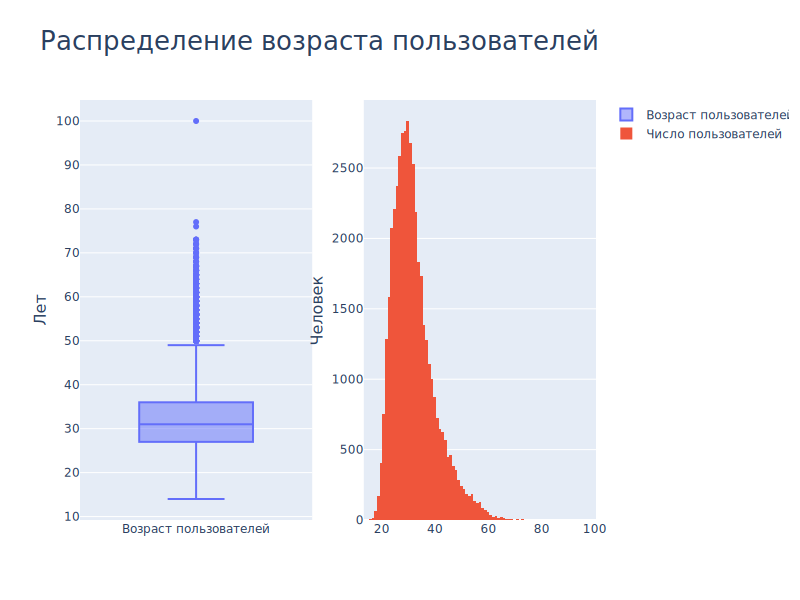

In [27]:
fig = make_subplots(rows=1, cols=2)


boxplot = go.Box(y=merged["Возраст"], name="Возраст пользователей")
fig.add_trace(
    boxplot,
    row=1, col=1
    
)
fig['layout']['yaxis'].update(title_text='Лет', title_standoff=1, title_font = {'size':16}) 
# оси должны быть подписаны

fig.add_trace(
    go.Histogram(x=merged["Возраст"], name='Число пользователей'),
    row=1, col=2
)

fig['layout']['yaxis2'].update(title_text='Человек', title_standoff=1, title_font = {'size':16})


fig.update_layout(height=600, width=800, title_text="Распределение возраста пользователей", title_font = {'size':26})
fig.show('svg')

### Выводы:
(Задание 4.1 решено с помощью графика (ответ может быть найден напрямуб на графике))
Мода признака - 30 лет, что почти совпадает с медианой - 31 год. Распределение не идеально нормальное с правым смещением (по естественным причинам - слева есть строгая граница в 14 лет, раньше которых работать нельзя, а справа ее нет).

Предельные значения 14 и 100 лет. Согласно рабочему кодексу РФ оффициально раотать можно с 14 лет, так что нижний порог вполне реалистичен. Высший порог в 100 лет сильно отделен от остальных значений и имеет большие шансы оказаться выбросом - нужно смотреть на него в отдельности. Остальные "выбросы" в боксплоте не выглядят чем-то нереальным и скорее всего являются реальными значениями.

Большинство соискателей находятся в интервале возраста от 14 до 49 лет (размах усов). Половина всех соискателей сосредоточена в 9 годах от 27 до 36 лет (25-75 квантили).


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

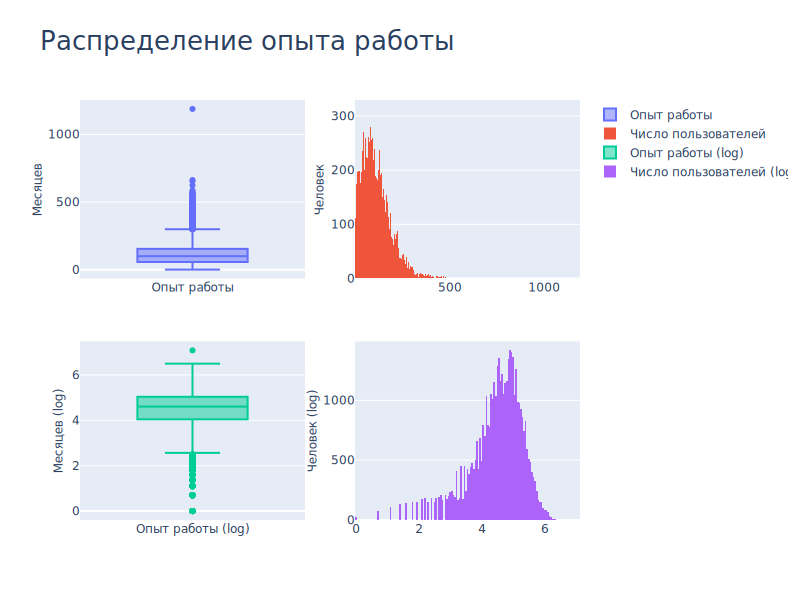

In [28]:
fig = make_subplots(rows=2, cols=2)


fig.add_trace(
    go.Box(y=merged["Опыт работы (месяц)"], 
           name="Опыт работы"),
    row=1, col=1
)

fig['layout']['yaxis'].update(title_text='Месяцев', 
                              title_standoff=1, 
                              title_font = {'size':12}) 

fig.add_trace(
    go.Histogram(x=merged["Опыт работы (месяц)"], 
                 name='Число пользователей', 
                 # Изменение числа бинов, чтобы каждый "пенек" соотвествовал одному дата-поинту
                 # и из графика можно было прочесть моду
                 nbinsx=int(merged["Опыт работы (месяц)"].max())), 
    row=1, col=2
)

fig['layout']['yaxis2'].update(title_text='Человек', 
                               title_standoff=1, 
                               title_font = {'size':12})


# Распределение еще более ненормальное чем предыдущее, попробуем лог ось
# Логарифмируем данные отдельно

log_exp = np.log(merged["Опыт работы (месяц)"])

fig.add_trace(
    go.Box(y=log_exp, 
           name="Опыт работы (log)"), 
    row=2, col=1
)



fig['layout']['yaxis3'].update(title_text='Месяцев (log)', 
                               title_standoff=1, 
                               title_font = {'size':12}) 

fig.add_trace(
    go.Histogram(x=log_exp, 
                 name='Число пользователей (log)'),
    row=2, col=2
)

fig['layout']['yaxis4'].update(title_text='Человек (log)', 
                               title_standoff=1, 
                               title_font = {'size':12}) 



fig.update_layout(height=600, 
                  width=800, 
                  title_text="Распределение опыта работы", 
                  title_font = {'size':26})
fig.show('svg')

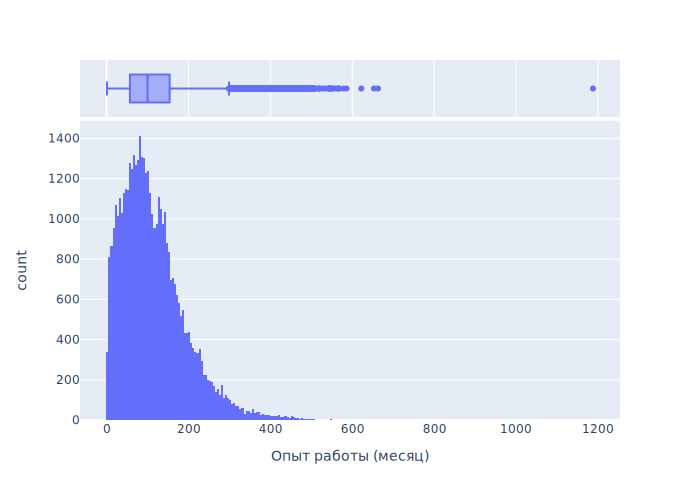

In [29]:
# Ok вариант из подсказки тоже работает :)
import plotly.express as px
fig = px.histogram(merged,
                   x="Опыт работы (месяц)",
                   marginal="box",
                   hover_data=merged.columns)
fig.show('svg')

### Выводы:
(Задание 4.2 решено с помощью графика (ответ может быть найден напрямую на графике))
Медиана - 100, Мода - 81. Распределение выглядит как усеченное нормальное, если лог-трансформировать, становится лучше, но не сильно :).

Предельные значения: макс - 1188 месяцев (~ 99 года) - явный выброс, мин - 1 месяц (логично). Остальные значения могут быть реалистичными (55 года это внушающий опыт работы, но столько хотя бы живут. Плюс, если выставить hover_data - становится видно что у людей с таким огромным опытом и возраст соотвествующией).

Опыт работы большинства (размах усов) находится в интервале с 1 до 299 месяцев. Половина (IQR) соискателей имеет опыт от 57 до 154 месяцев.



3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


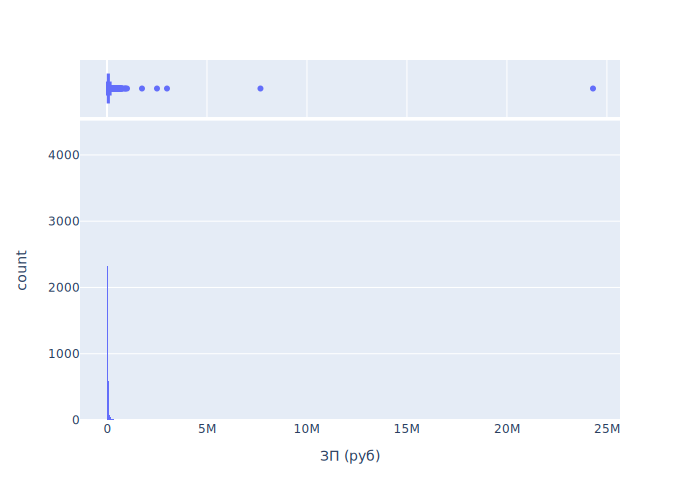

In [30]:
fig = px.histogram(merged, x="ЗП (руб)",
                   marginal="box",
                   hover_data=merged.columns)
fig.show('svg') # если сохранять как статичную картинку - весь смысл plotly теряется
# давайте предстваим что это все тоже интерактивный и масштабируемый график :)

Здесь мы добавим моду на график (на графике плотли удобно смотреть другие параметры, но как туда добавить моду я так и не нашел. Пожтому строим еще один график, но с модой)

Text(50000.0, 4000, 'Mode: 50000.00')

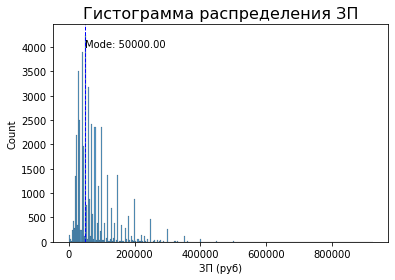

In [31]:
merged_trunk = merged[merged["ЗП (руб)"] < 1000000]

hist=sns.histplot(
    data=merged_trunk, # иначе мы вообще ничего не увидим
    x='ЗП (руб)')

hist.set_title('Гистограмма распределения ЗП', fontsize=16)
mode = merged_trunk['ЗП (руб)'].mode()[0]
hist.axvline(x=mode,
            color='blue',
            ls='--', 
            lw=1)

hist.text(mode, 4000, 'Mode: {:.2f}'.format(mode))



Задание 4.3

Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

In [32]:
# можно по графику (плотли), а можно и так
merged[merged['ЗП (руб)'] > 1000000].shape[0]

5

### Выводы:
Чтобы найти моду именно по графику, пришлось строить отдельный sns histplot (визуализация каждого значения через "пенек" в plotly перегрузилa бы систему). Мода равна 50т.р.
Предельные значения признака: от 1го рубля (видимо стажировка) до ~24 млн.р. Большинство значений лежит в размахе от 1 р до 180 т.р. 
Зарплату в 24 млн.р. наверное можно отнести к аномалиям, хотя я имею очень слабое представление о реальных макс зп в отрасли.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

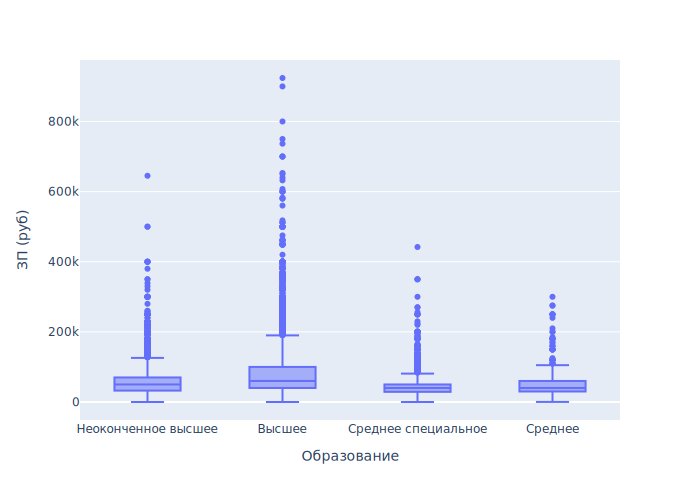

In [33]:
fig = px.box(merged_trunk, x="Образование", y="ЗП (руб)")
fig.show('svg')

### Выводы:

Ожидаемо, уровень образования напрямую влияет на уровнь ЗП (40% разница между высшей и низшей категорией). 

Низшее значение у Средне-специального и среднего (40 т.р.), промежуточный у неоконченного высшего (50 т.р.) и максимальный у высшего (60 т.р). Причем и распределение у высшего растянуто вверх куда дальше чем у любой другой категории.

Для расчета уровня ЗП - уровень образования может быть одним из важнейших признаков.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

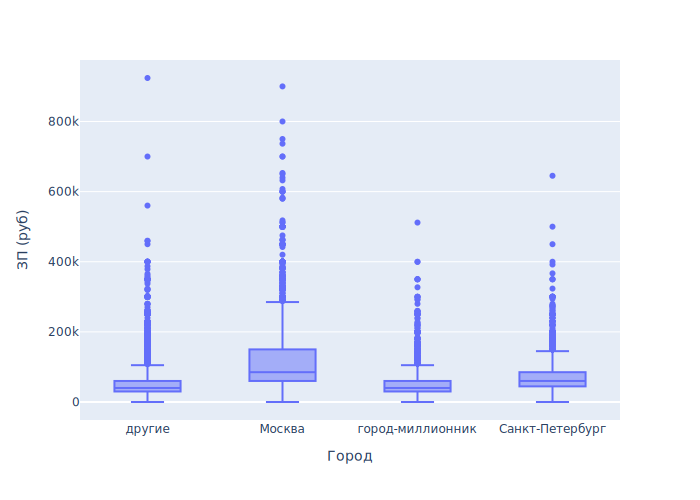

In [34]:
fig = px.box(merged_trunk, x="Город", y="ЗП (руб)")
fig.show('svg')

### Выводы:
*(ответ на задание 4.4 и 4.5 находятся на графике)*

Города миллионники и другие города создают очень плотную группу, почти неразличимую ни по медиане, ни по размаху. Их можно было бы безболезненно объединить в одну категорию.

Петербург и особенно Москва на этом фоне очень выделяются. Медиана у Питера на 40% выше и у Москва в ~2 раза выше чем у других городов. Размах значений огромный у Москвы - подавляющее большинство самых высокооплачиваемых рабочих мест сосредоточено там.

Города тоже являются хорошим предсказывающим фактором для оценки ЗП, но категория "города-миллионники" избыточна, ее можно слить с "другими" без потери информативности.


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

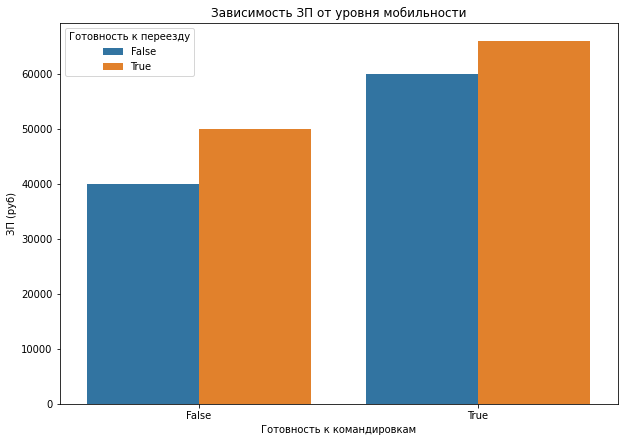

In [35]:
# проведем предварительную группировку
mobility_sal = merged_trunk.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index = False)["ЗП (руб)"].median()

# зададим размер графика
fig = plt.figure(figsize=(10, 7))

# построим барплоты с группировкой по "Готовности к переезду" 
# (можно и по Готовности к командировкам, тут неважно)
barplot = sns.barplot(
    data=mobility_sal,
    x='Готовность к командировкам',
    y="ЗП (руб)",
    hue='Готовность к переезду'    
)

barplot.set_title('Зависимость ЗП от уровня мобильности');



<AxesSubplot:xlabel='Готовность к переезду'>

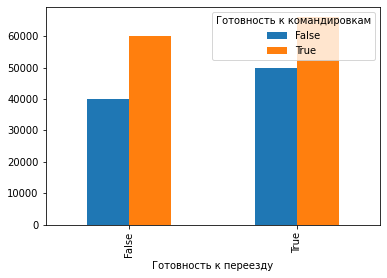

In [36]:
# ну или проще:
mobility_sal2 = merged_trunk.groupby(['Готовность к переезду', 'Готовность к командировкам'])["ЗП (руб)"].median()
mobility_sal2.unstack().plot(kind='bar')

 Задание 4.6

Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).

In [37]:
round(mobility_sal[(mobility_sal['Готовность к переезду'] == True) 
             & (mobility_sal['Готовность к командировкам'] == True)]["ЗП (руб)"]/1000)

3    66.0
Name: ЗП (руб), dtype: float64

### Выводы:
Выводы просты - чем выше готовность к переезду и командировкам (в большей степени), тем выше ЗП.
Показатели мобильности - важные параметры для предсказания ЗП.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

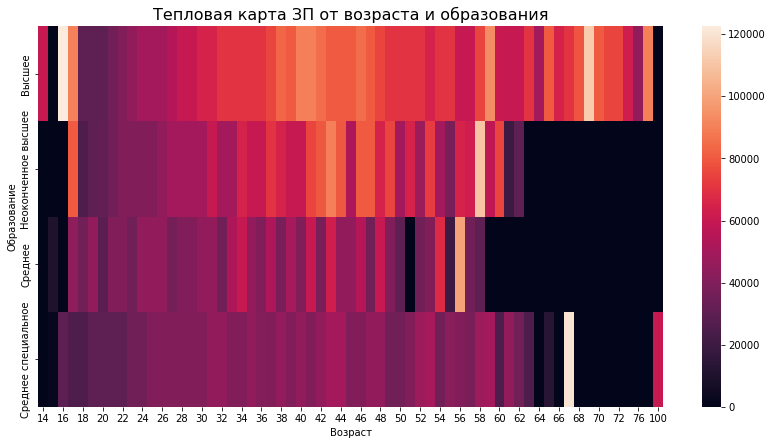

In [38]:
# Создадим сводную таблицу по значениям ЗП, группированным по уровню образования и возрасту.
mt_pivot = merged_trunk.pivot_table(
    values="ЗП (руб)",
    index='Образование',
    columns='Возраст',
    fill_value=0,
    aggfunc=np.median # вместо дефолтного median
).round()

fig = plt.figure(figsize=(14, 7)) # зададим размер хитмапа
heatmap = sns.heatmap(data=mt_pivot)
heatmap.set_title('Тепловая карта ЗП от возраста и образования', fontsize=16);

### Выводы:

*(ответ на задание 4.7  находится на графике)*

Если не учился на разработчика - не лезь, иначе будешь вечно сидеть на мизерной зарплате (к сожалению выглядит как не шутка). 

Ожидаемо, люди с высшим образованием выходят на высокие уровни ЗП значительно раньше остальных групп.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

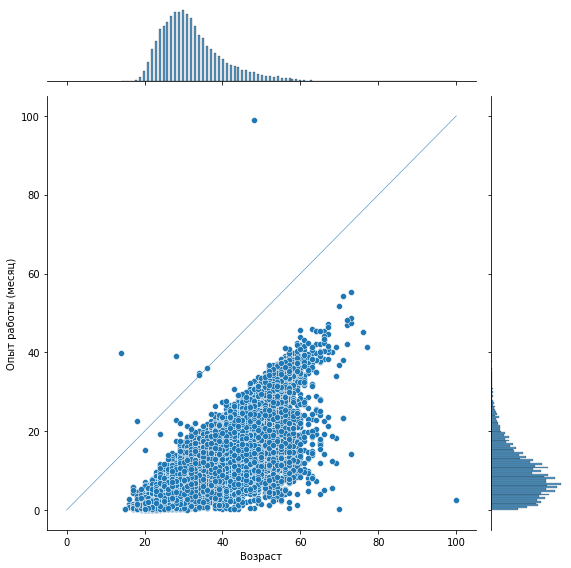

In [39]:
join=sns.jointplot(
    data=merged, 
    y=merged['Опыт работы (месяц)']/12, 
    x='Возраст',
    height=8
)
join.ax_joint.plot([0,100], [0,100], linewidth = 0.5)
# ничего нигде не сливается, особенно если линию сделать потоньше или точки пожирнее.


### Выводы:
*(ответ на задание 4.8  находится на графике)*

Если бы был построен другой график, наверняка можно было бы заметить взаимосвязь между возрастом и опытом (а она скорее всего есть). А так заметно только, что вщ всех возрастных категориях есть кандидаты с опытом от минимального до максимального возможного для их возраста.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


### Доп плот 1
То, что напрашивается само собой - распределение ЗП между полами с доп факторами. Попробуем оценить сколько лет продуктивной работы выпадает у женщин по сравнению с мужчинами из-за необходимости воспитывать детей и как это отражается на уровне ЗП). 


Text(0.5, 1.0, 'Тепловая карта ЗП от возраста и пола')

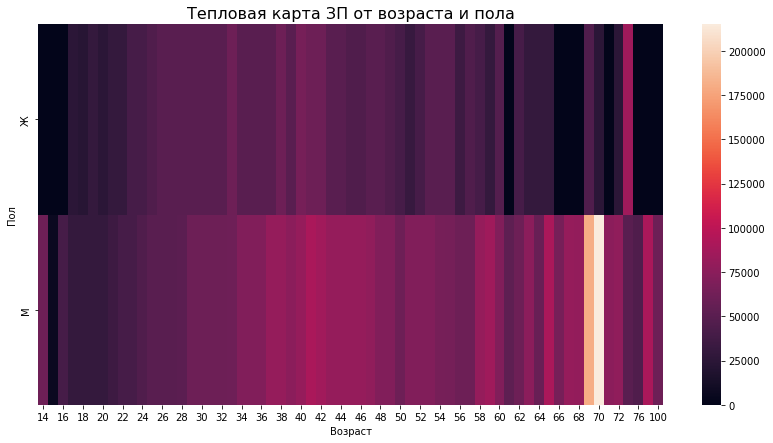

In [40]:
# Создадим сводную таблицу по значениям ЗП, группированным по полу.
mt_pivot = merged_trunk.pivot_table(
    values="ЗП (руб)",
    index='Пол',
    columns= 'Возраст',
    fill_value=0,
    aggfunc=np.median # вместо дефолтного median
).round()

fig = plt.figure(figsize=(14, 7)) # зададим размер хитмапа
heatmap = sns.heatmap(data=mt_pivot)
heatmap.set_title('Тепловая карта ЗП от возраста и пола', fontsize=16)

### Выводы:
Кроме очевидной разницы в общем размере зарплаты, можно заметить некоторые особенности распределения по возрасту:в возрасте 17-23 года у обоих полов вполне схожая тенденция роста ЗП, позже в 24-40 лет, когда у мужчин произходит основной рост ЗП, у женщин наоборот плато, обусловленное вероятно рождением и воспитанием детей. 

Пол является сильным предсказательным фактором, серьезно влияющим на уровень зарплаты.

### Доп плот 2:
Из обработанных столюцов осталось не так много. Посмотрим на зависимость предпочтений графика на ЗП.

[(-10000.0, 400000.0), Text(0.5, 1.0, 'вахтовый метод')]

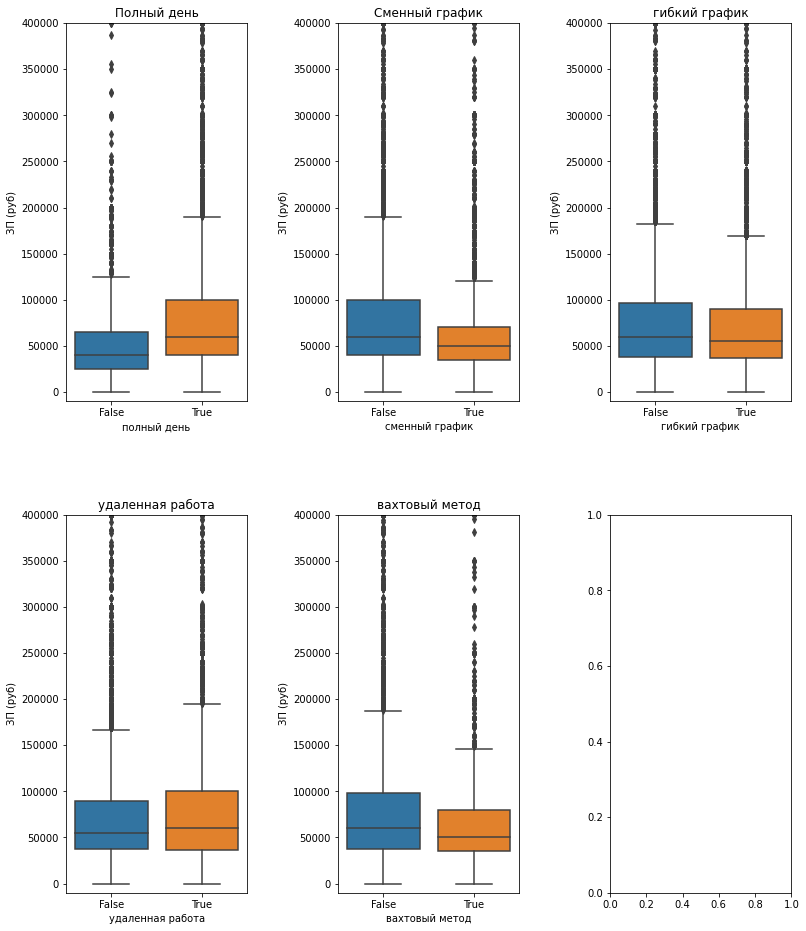

In [41]:
# 5 пар боксплотов для того чтобы сравнить распределение ЗП у согласных и несогласных на определенный график работы.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 16)) #размер
plt.subplots_adjust(wspace = 0.5, hspace = 0.3) # чуть чуть их раздвинем - чтобы подписи не мешались


sns.boxplot(
    data=merged_trunk,
    x='полный день',   
    y='ЗП (руб)',
    ax=axes[0,0]
)

axes[0,0].set(ylim=(-10000,400000), title='Полный день')    #выбросы очень растягивают картинку, обрежем

sns.boxplot(
    data=merged_trunk,
    x='сменный график',   
    y='ЗП (руб)',
    ax=axes[0,1]
)

axes[0,1].set(ylim=(-10000,400000), title='Сменный график')  

sns.boxplot(
    data=merged_trunk,
    x='гибкий график',  
    y='ЗП (руб)',
    ax=axes[0,2]
)

axes[0,2].set(ylim=(-10000,400000), title='гибкий график')  


sns.boxplot(
    data=merged_trunk,
    x='удаленная работа',   
    y='ЗП (руб)',
    ax=axes[1,0]
)
axes[1,0].set(ylim=(-10000,400000), title='удаленная работа') 



sns.boxplot(
    data=merged_trunk,
    x='вахтовый метод',  
    y='ЗП (руб)',
    ax=axes[1,1]
)
axes[1,1].set(ylim=(-10000,400000), title='вахтовый метод') 

### Выводы:
Нужно было делать боксплоты через плотли - было бы проще с масштабированием :).

Если по сути, видно, что самый важный предиктор уровня ЗП из всех вариантов графика это готовность или неготовность работать полный день. Остальные варианты тоже играют значение, но их бы я проверял всех скопом для удобства через матрицу корреляции, которую мы еще не проходили. Иначе, их значимость оценить сложно.


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [42]:
merged_dedup = merged.drop_duplicates(subset=list(merged.columns))


 Задание 5.1

Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.
Сколько полных копий удалось найти?

In [43]:
merged.duplicated(subset=list(merged.columns)).sum()

161

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [44]:
merged_dedup.isnull().sum()


Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
стажировка                           0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
сменный график                       0
полный день                          0
вахтовый метод                       0
удаленная работа                     0
гибкий график                        0
date                                 0
ЗП (руб)                             0
dtype: int64

 Задание 5.2

Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.
Сколько пропусков в столбце «Опыт работы (месяц)»?

In [45]:
merged_dedup['Опыт работы (месяц)'].isnull().sum()

168

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [46]:
# Найдем индексы строк с пропусками в месте и должности
rows_with_nans = list(merged_dedup[(merged_dedup['Последняя/нынешняя должность'].isnull()==True) | (merged_dedup['Последнее/нынешнее место работы'].isnull()==True)].index)
# Дропнем их
merged_dedup = merged_dedup.drop(rows_with_nans, axis=0)
# Все оставшиеся пропуски находятся в одном столбце, так что можно не слайсить
merged_dedup = merged_dedup.fillna(merged_dedup["Опыт работы (месяц)"].median())

 Задание 5.3

Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых. 

In [47]:
round(merged_dedup["Опыт работы (месяц)"].mean())

114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [48]:
# Найдем индексы выбросов
outl_index = merged_dedup[(merged_dedup['ЗП (руб)'] > 1000000) | (merged_dedup['ЗП (руб)'] < 1000)].index
# дропнем по индексам и заодно вернемся к более короткому неймингу
df = merged_dedup.drop(outl_index, axis=0)

 Задание 5.4

Сколько выбросов вы нашли?

In [49]:
len(outl_index)

89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [50]:
# количество выбросов, Задание 5.5
print(df[(round(df['Опыт работы (месяц)']/12) >= df['Возраст'])].shape[0])
# удаление выбросов
df = df[~(round(df['Опыт работы (месяц)']/12) >= df['Возраст'])]

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

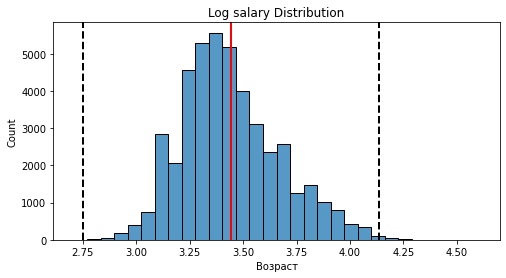

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(df['Возраст'])  # возраста = 0 в данных нету
histplot = sns.histplot(log_age, bins=30, ax=ax)
# получилась гистограмма со смещением вправо
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log salary Distribution');

In [52]:
# Ищем выбросы
    
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    """Функция для нахождения выбросов по методу z-отклонения"""
    
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(df, 'Возраст', log_scale=True, left=3 ,right=4)

# Задание 5.6
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
outliers['Возраст']

Число выбросов по методу z-отклонения: 3


31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

### Выводы:
Видно то, что мы уже обсуждали раньше - четкая граница в 14\15 лет и отсутсвие таковой четкой границы в пожилом возрасте обусловливает смещение распределения вправо. Какие-то другие выводы по графику делать сложно.